# Image Quality Assessment

Contents:
Computation of the following on a dataset
- Mean-Squared Error
- Peak Signal to Noise Ratio
- Structural Similarity Index
- Spearman Rank Order Cross Correlation

Author: Abijith J. Kamath
https://kamath-abhijith.github.io

In [1]:
import numpy as np

from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from scipy import stats
from scipy.io import loadmat
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [2]:
## HELPER FUNCTIONS

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [3]:
## READ DATASET

dataset = loadmat("hw5/hw5.mat")
blur_dmos = dataset['blur_dmos'][0]
refnames_blur = dataset['refnames_blur']

blur_images = io.imread_collection('hw5/gblur/*.bmp')
num_images = sum(dataset['blur_orgs'][0] == 0)

In [12]:
## PERFORMANCE SCORES

mse_score = np.zeros(num_images)
psnr_score = np.zeros(num_images)
ssim_score = np.zeros(num_images)
for i in range(num_images):
    true_image = rgb2gray(io.imread("hw5/refimgs/"+"".join(refnames_blur[0,i])))
    blur_image = rgb2gray(blur_images[i])

    mse_score[i] = mse(blur_image, true_image)
    psnr_score[i] = 10.0*np.log10(255.0/mse_score[i])
    ssim_score[i] = ssim(blur_image, true_image, data_range=true_image.max() - true_image.min())

mse_corr, _ = stats.spearmanr(mse_score, blur_dmos[0:num_images])
psnr_corr, _ = stats.spearmanr(psnr_score, blur_dmos[0:num_images])
ssim_corr, _ = stats.spearmanr(ssim_score, blur_dmos[0:num_images])

print("The correlation with perception and MSE is  %.4f"%(mse_corr))
print("The correlation with perception and PSNR is  %.4f"%(psnr_corr))
print("The correlation with perception and SSIM is  %.4f"%(ssim_corr))

The correlation with perception and MSE is  0.7823
The correlation with perception and PSNR is  -0.7823
The correlation with perception and SSIM is  -0.9200


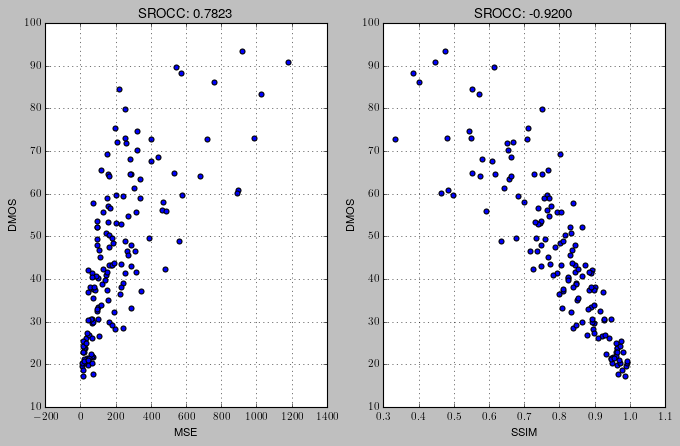

In [18]:
## PLOTS

style.use('classic')
rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].scatter(mse_score, blur_dmos[0:num_images])
plts[0].grid('on')
plts[0].set_title(r"SROCC: %.4f"%(mse_corr))
plts[0].set_ylabel(r"DMOS")
plts[0].set_xlabel(r"MSE")

plts[1].scatter(ssim_score, blur_dmos[0:num_images])
plts[1].grid('on')
plts[1].set_title(r"SROCC: %.4f"%(ssim_corr))
plts[1].set_ylabel(r"DMOS")
plts[1].set_xlabel(r"SSIM")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_4/Answers/figures/qassess.eps', format='eps')
plt.show()